In [1]:
%pylab inline
%matplotlib inline

import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


In [2]:
X=np.array([[3,5],[5,1],[10,2]],dtype=float)
y=np.array([[75],[82],[93]],dtype=float)

In [3]:
X

array([[  3.,   5.],
       [  5.,   1.],
       [ 10.,   2.]])

In [4]:
y

array([[ 75.],
       [ 82.],
       [ 93.]])

In [5]:
X=X/np.amax(X, axis=0)
y=y/100 # Max test score is 100

In [6]:
X

array([[ 0.3,  1. ],
       [ 0.5,  0.2],
       [ 1. ,  0.4]])

In [7]:
y

array([[ 0.75],
       [ 0.82],
       [ 0.93]])

In [8]:
#New complete class, with changes:
class Neural_Network(object):
    def __init__(self, Lambda=0):        
        #Define Hyperparameters
        self.inputLayerSize = 2
        self.outputLayerSize = 1
        self.hiddenLayerSize = 3
        
        #Weights (parameters)
        self.W1 = np.random.randn(self.inputLayerSize,self.hiddenLayerSize)
        self.W2 = np.random.randn(self.hiddenLayerSize,self.outputLayerSize)
        
        #Regularization Parameter:
        self.Lambda = Lambda
        
    def forward(self, X):
        #Propogate inputs though network
        self.z2 = np.dot(X, self.W1)
        self.a2 = self.sigmoid(self.z2)
        self.z3 = np.dot(self.a2, self.W2)
        yHat = self.sigmoid(self.z3) 
        return yHat
        
    def sigmoid(self, z):
        #Apply sigmoid activation function to scalar, vector, or matrix
        return 1/(1+np.exp(-z))
    
    def sigmoidPrime(self,z):
        #Gradient of sigmoid
        return np.exp(-z)/((1+np.exp(-z))**2)
    
    def costFunction(self, X, y):
        #Compute cost for given X,y, use weights already stored in class.
        self.yHat = self.forward(X)
        J = 0.5*sum((y-self.yHat)**2)/X.shape[0] + (self.Lambda/2)*(np.sum(self.W1**2)+np.sum(self.W2**2))
        return J
        
    def costFunctionPrime(self, X, y):
        #Compute derivative with respect to W and W2 for a given X and y:
        self.yHat = self.forward(X)
        
        delta3 = np.multiply(-(y-self.yHat), self.sigmoidPrime(self.z3))
        #Add gradient of regularization term:
        dJdW2 = np.dot(self.a2.T, delta3)/X.shape[0] + self.Lambda*self.W2
        
        delta2 = np.dot(delta3, self.W2.T)*self.sigmoidPrime(self.z2)
        #Add gradient of regularization term:
        dJdW1 = np.dot(X.T, delta2)/X.shape[0] + self.Lambda*self.W1
        
        return dJdW1, dJdW2
    
    #Helper functions for interacting with other methods/classes
    def getParams(self):
        #Get W1 and W2 Rolled into vector:
        params = np.concatenate((self.W1.ravel(), self.W2.ravel()))
        return params
    
    def setParams(self, params):
        #Set W1 and W2 using single parameter vector:
        W1_start = 0
        W1_end = self.hiddenLayerSize*self.inputLayerSize
        self.W1 = np.reshape(params[W1_start:W1_end], \
                             (self.inputLayerSize, self.hiddenLayerSize))
        W2_end = W1_end + self.hiddenLayerSize*self.outputLayerSize
        self.W2 = np.reshape(params[W1_end:W2_end], \
                             (self.hiddenLayerSize, self.outputLayerSize))
        
    def computeGradients(self, X, y):
        dJdW1, dJdW2 = self.costFunctionPrime(X, y)
        return np.concatenate((dJdW1.ravel(), dJdW2.ravel()))

In [9]:
NN = Neural_Network()

In [10]:
yHat = NN.forward(X)

In [11]:
yHat

array([[ 0.40770762],
       [ 0.40273459],
       [ 0.38907352]])

In [12]:
import time

numberOfWeightsToTests = 1000
weightsToTry = np.linspace(-10,10,numberOfWeightsToTests)
costs = np.zeros(numberOfWeightsToTests)
startTime = time.clock()
for i in range(numberOfWeightsToTests):
    NN.W1[0,0] = weightsToTry[i]
    yHat = NN.forward(X)
    costs[i] = 0.5 * sum((y - yHat) ** 2)

endTime = time.clock()


In [13]:
timeElapsed = endTime - startTime
timeElapsed

0.026025999999999883

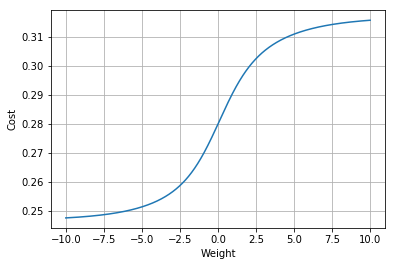

In [14]:
plot(weightsToTry, costs)
grid(1)
ylabel('Cost')
xlabel('Weight')

In [15]:
def sigmoidPrime(z):
        return np.exp(-z)/((1+np.exp(-z))**2)
    
def sigmoid(x):
    # Apply sigmoid activation function to scalar, vector, or matrix
    return 1 / (1 + np.exp(-x))

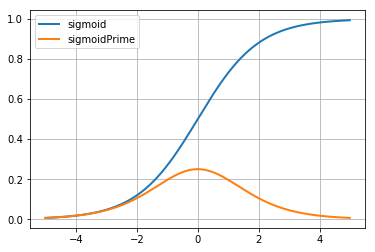

In [16]:
testValues = np.arange(-5,5,0.01)
plt.plot(testValues, sigmoid(testValues), linewidth=2)
plt.plot(testValues, sigmoidPrime(testValues), linewidth=2)
plt.grid(1)
plt.legend(['sigmoid','sigmoidPrime'])

In [17]:
NN = Neural_Network()

In [18]:
cost1 = NN.costFunction(X,y)

In [19]:
dJdW1, dJdW2 = NN.costFunctionPrime(X,y)

In [20]:
dJdW1

array([[-0.00212572, -0.00943396,  0.00596435],
       [-0.00167134, -0.00647657,  0.00515688]])

In [21]:
dJdW2

array([[-0.04004122],
       [-0.02577793],
       [-0.01987997]])

In [22]:
scalar = 3
NN.W1 = NN.W1 * scalar*dJdW1
NN.W2 = NN.W2 * scalar*dJdW2
cost2 = NN.costFunction(X,y)

In [23]:
print(cost1, cost2)

0.0354831735082 0.0607529781619


In [24]:
def f(x):
    return x**2
    
epsilon = 1e-4
x = 1.5
numericGradient = (f(x+epsilon)-f(x-epsilon))/(2*epsilon)
numericGradient, 2*x

(2.9999999999996696, 3.0)

In [25]:
def computeNumericalGradient(N, X, y):
    paramsInitial = N.getParams();
    numgrad = np.zeros(paramsInitial.shape)
    perturb = np.zeros(paramsInitial.shape)
    e = 1e-4

    for p in range(len(paramsInitial)):
        # Set perturbation vector
        perturb[p] = e
        N.setParams(paramsInitial + perturb)
        loss2 = N.costFunction(X, y)

        N.setParams(paramsInitial - perturb)
        loss1 = N.costFunction(X, y)

        # Compute numerical gradient
        numgrad[p] = (loss2 - loss1) / (2 * e)

        # return the value we changed back to zero
        perturb[p] = 0

    # Returns params to the original value
    N.setParams(paramsInitial)

    return numgrad

In [26]:
NN = Neural_Network()
numgrad = computeNumericalGradient(NN, X, y)
grad = NN.computeGradients(X, y)

In [27]:
numgrad

array([-0.00490933,  0.00307248,  0.00629445, -0.0036141 ,  0.00265291,
        0.00440267, -0.0490918 , -0.06756708, -0.01131848])

In [28]:
grad

array([-0.00490933,  0.00307248,  0.00629445, -0.0036141 ,  0.00265291,
        0.00440267, -0.0490918 , -0.06756708, -0.01131848])

In [29]:
norm(grad - numgrad) / norm(grad + numgrad)

2.5213523592619495e-10

In [30]:
##Need to modify trainer class a bit to check testing error during training:
class trainer(object):
    def __init__(self, N):
        #Make Local reference to network:
        self.N = N
        
    def callbackF(self, params):
        self.N.setParams(params)
        self.J.append(self.N.costFunction(self.X, self.y))
        self.testJ.append(self.N.costFunction(self.testX, self.testY))
        
    def costFunctionWrapper(self, params, X, y):
        self.N.setParams(params)
        cost = self.N.costFunction(X, y)
        grad = self.N.computeGradients(X,y)
        
        return cost, grad
        
    def train(self, trainX, trainY, testX, testY):
        #Make an internal variable for the callback function:
        self.X = trainX
        self.y = trainY
        
        self.testX = testX
        self.testY = testY

        #Make empty list to store training costs:
        self.J = []
        self.testJ = []
        
        params0 = self.N.getParams()

        options = {'maxiter': 200, 'disp' : True}
        _res = optimize.minimize(self.costFunctionWrapper, params0, jac=True, method='BFGS', \
                                 args=(trainX, trainY), options=options, callback=self.callbackF)

        self.N.setParams(_res.x)
        self.optimizationResults = _res

In [32]:
NN.costFunctionPrime(X, y)

(array([[-0.00490933,  0.00307248,  0.00629445],
        [-0.0036141 ,  0.00265291,  0.00440267]]), array([[-0.0490918 ],
        [-0.06756708],
        [-0.01131848]]))

In [33]:
NN.forward(X)

array([[ 0.46979238],
       [ 0.43375088],
       [ 0.46586417]])

In [34]:
y

array([[ 0.75],
       [ 0.82],
       [ 0.93]])

In [35]:
# test network for various  combinations of sleep/study
hoursSleep = linspace(0, 10, 100)
hoursStudy = linspace(0, 5, 100)

# Normalize data 
hoursSleepNorm = hoursSleep/10
hoursStudyNorm = hoursStudy/5

# Create 2-d version of input for plotting
a, b = meshgrid(hoursSleepNorm, hoursStudyNorm)

# Join into a single input matrix:
allInputs = np.zeros((a.size, 2))
allInputs[:, 0] = a.ravel()
allInputs[:, 1] = b.ravel()

In [36]:
allOutputs = NN.forward(allInputs)

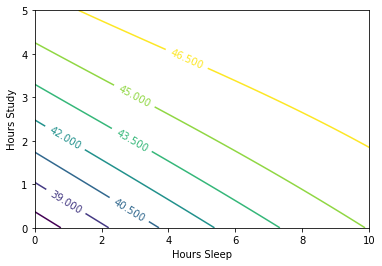

In [37]:
# Make contour plot
yy = np.dot(hoursStudy.reshape(100,1), np.ones((1, 100)))
xx = np.dot(hoursSleep.reshape(100,1), np.ones((1, 100))).T

CS = contour(xx, yy, 100* allOutputs.reshape(100, 100))
clabel(CS, inline=1, fontsize=10)
xlabel('Hours Sleep')
ylabel('Hours Study')

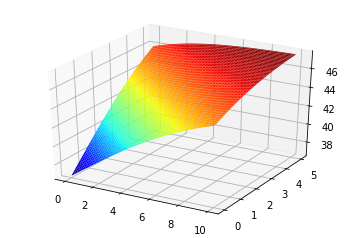

In [38]:
# Make a 3-D plot
from mpl_toolkits.mplot3d import axes3d
fig = plt.figure
ax = plt.gca(projection='3d')

surf = ax.plot_surface(xx, yy, 100*allOutputs.reshape(100,100), cmap=cm.jet)
ax.set_xlabel = 'Hours Sleep'
ax.set_ylabel = 'Hours Study'
ax.set_zlabel = 'Test Score'

In [39]:
NN = Neural_Network()

In [40]:
# X = (hours sleeping, hours studying), y = score on test
X = np.array(([3,5], [5,1], [10,2], [6,1.5]), dtype=float)
y = np.array(([75], [82], [93], [70]), dtype=float)

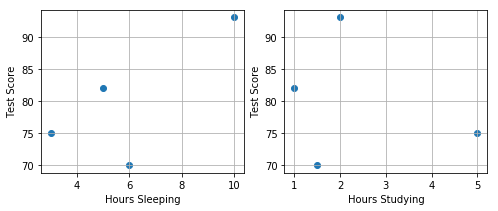

In [41]:
# Plot projections of our new data
fig = figure(0, (8,3))

subplot(1,2,1)
scatter(X[:,0], y)
grid(1)
xlabel('Hours Sleeping')
ylabel('Test Score')

subplot(1,2,2)
scatter(X[:,1], y)
grid(1)
xlabel('Hours Studying')
ylabel('Test Score')

In [42]:
#Normalize
X = X/np.amax(X, axis = 0)
y = y/100 # Max test score is 100

In [43]:
#Test network for various combinations of sleep/study:
hoursSleep = linspace(0, 10, 100)
hoursStudy = linspace(0, 5, 100)

#Normalize data (same way training data way normalized)
hoursSleepNorm = hoursSleep/10.
hoursStudyNorm = hoursStudy/5.

#Create 2-d versions of input for plotting
a, b  = meshgrid(hoursSleepNorm, hoursStudyNorm)

#Join into a single input matrix:
allInputs = np.zeros((a.size, 2))
allInputs[:, 0] = a.ravel()
allInputs[:, 1] = b.ravel()

In [44]:
allOutputs = NN.forward(allInputs)

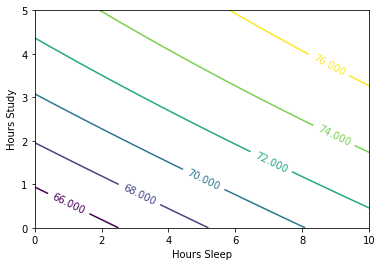

In [45]:
#Contour Plot:
yy = np.dot(hoursStudy.reshape(100,1), np.ones((1,100)))
xx = np.dot(hoursSleep.reshape(100,1), np.ones((1,100))).T

CS = contour(xx,yy,100*allOutputs.reshape(100, 100))
clabel(CS, inline=1, fontsize=10)
xlabel('Hours Sleep')
ylabel('Hours Study')

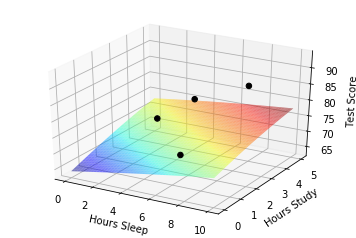

In [46]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.gca(projection='3d')

#Scatter training examples:
ax.scatter(10*X[:,0], 5*X[:,1], 100*y, c='k', alpha = 1, s=30)


surf = ax.plot_surface(xx, yy, 100*allOutputs.reshape(100, 100), \
                       cmap=cm.jet, alpha = 0.5)


ax.set_xlabel('Hours Sleep')
ax.set_ylabel('Hours Study')
ax.set_zlabel('Test Score')

In [47]:
#Training Data:
trainX = np.array(([3,5], [5,1], [10,2], [6,1.5]), dtype=float)
trainY = np.array(([75], [82], [93], [70]), dtype=float)

#Testing Data:
testX = np.array(([4, 5.5], [4.5,1], [9,2.5], [6, 2]), dtype=float)
testY = np.array(([70], [89], [85], [75]), dtype=float)

#Normalize:
trainX = trainX/np.amax(trainX, axis=0)
trainY = trainY/100 #Max test score is 100

#Normalize by max of training data:
testX = testX/np.amax(trainX, axis=0)
testY = testY/100 #Max test score is 100

In [48]:
#Train network with new data:
NN = Neural_Network()

T = trainer(NN)
T.train(trainX, trainY, testX, testY)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 175
         Function evaluations: 193
         Gradient evaluations: 193


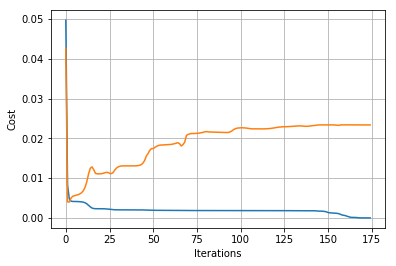

In [49]:
#Plot cost during training:
plot(T.J)
plot(T.testJ)
grid(1)
xlabel('Iterations')
ylabel('Cost')

In [50]:
#Regularization Parameter:
Lambda = 0.0001

In [51]:
NN = Neural_Network(Lambda=0.0001)

In [52]:
#Make sure our gradients our correct after making changes:
numgrad = computeNumericalGradient(NN, X, y)
grad = NN.computeGradients(X,y)

In [53]:
#Should be less than 1e-8:
norm(grad-numgrad)/norm(grad+numgrad)

1.3290926345805631e-10

In [54]:
T = trainer(NN)

In [55]:
T.train(X,y,testX,testY)

Optimization terminated successfully.
         Current function value: 0.002729
         Iterations: 76
         Function evaluations: 81
         Gradient evaluations: 81


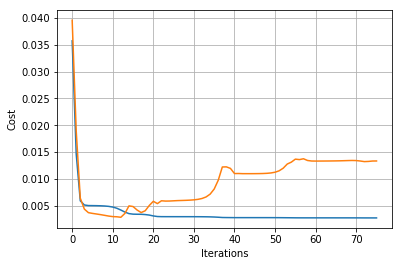

In [56]:
plot(T.J)
plot(T.testJ)
grid(1)
xlabel('Iterations')
ylabel('Cost')

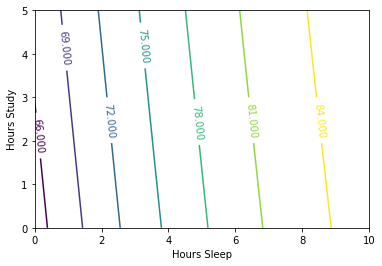

In [57]:
allOutputs = NN.forward(allInputs)

#Contour Plot:
yy = np.dot(hoursStudy.reshape(100,1), np.ones((1,100)))
xx = np.dot(hoursSleep.reshape(100,1), np.ones((1,100))).T

CS = contour(xx,yy,100*allOutputs.reshape(100, 100))
clabel(CS, inline=1, fontsize=10)
xlabel('Hours Sleep')
ylabel('Hours Study')

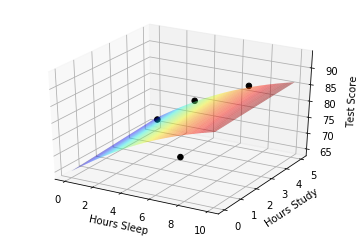

In [58]:
#3D plot:

##Uncomment to plot out-of-notebook (you'll be able to rotate)
#%matplotlib qt

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.gca(projection='3d')

ax.scatter(10*X[:,0], 5*X[:,1], 100*y, c='k', alpha = 1, s=30)


surf = ax.plot_surface(xx, yy, 100*allOutputs.reshape(100, 100), \
                       cmap=cm.jet, alpha = 0.5)

ax.set_xlabel('Hours Sleep')
ax.set_ylabel('Hours Study')
ax.set_zlabel('Test Score')